In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score as ac, classification_report as report, confusion_matrix as cm
# Membaca Data
df = pd.read_csv('WaterQuality.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
# Melihat baris,kolom
df.shape 

(3276, 10)

In [4]:
# Melihat Jumlah Non-Null Di Setiap Kolom & Melihat Tipe Data Di Setiap Kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
# Melihat Jumlah Nilai Null Di Setiap Kolom
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Missing Value Handling

In [6]:
# Mengisi Missing Value Dengan Nilai Rata-Rata
df.fillna(df.mean(),inplace = True)

# Melihat 5 Baris Pertama
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
# Melihat Nilai Null
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Visualisasi Korelasi antar Fitur menggunakan Heatmap

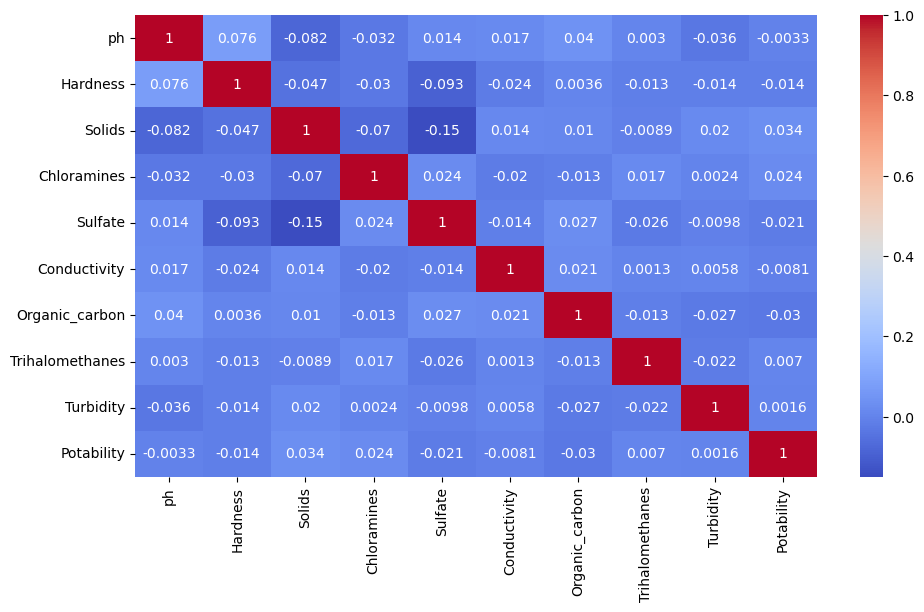

In [8]:
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')
fig = plt.gcf()
fig.set_size_inches(11,6)
plt.show()

# Melihat Outlier

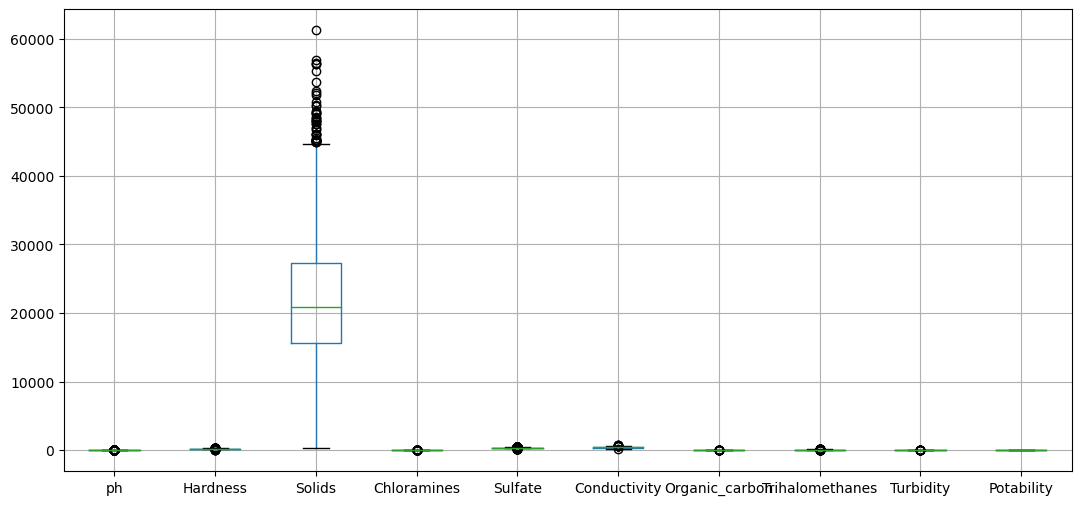

In [9]:
df.boxplot(figsize=(13,6))
plt.show()

In [10]:
df['Solids'].describe()
# Walaupun ada outlier di kolom Solids, kolom tersebut diputuskan untuk tidak dihapus karena mungkin jika nilai di kolom
# Solids tinggi, water dilabelkan 'not potable'

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

# Melihat Perbandingan Label 0 (Not Potable) & 1 (Potable)

C:\Users\Gabriel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


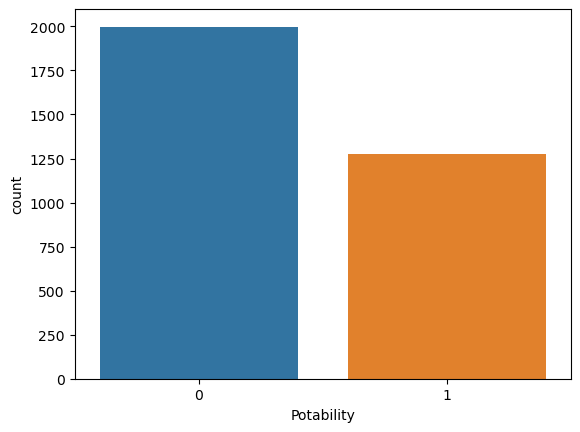

In [11]:
sns.countplot(df['Potability'])
plt.show()

# Histogram Untuk Distribusi Data

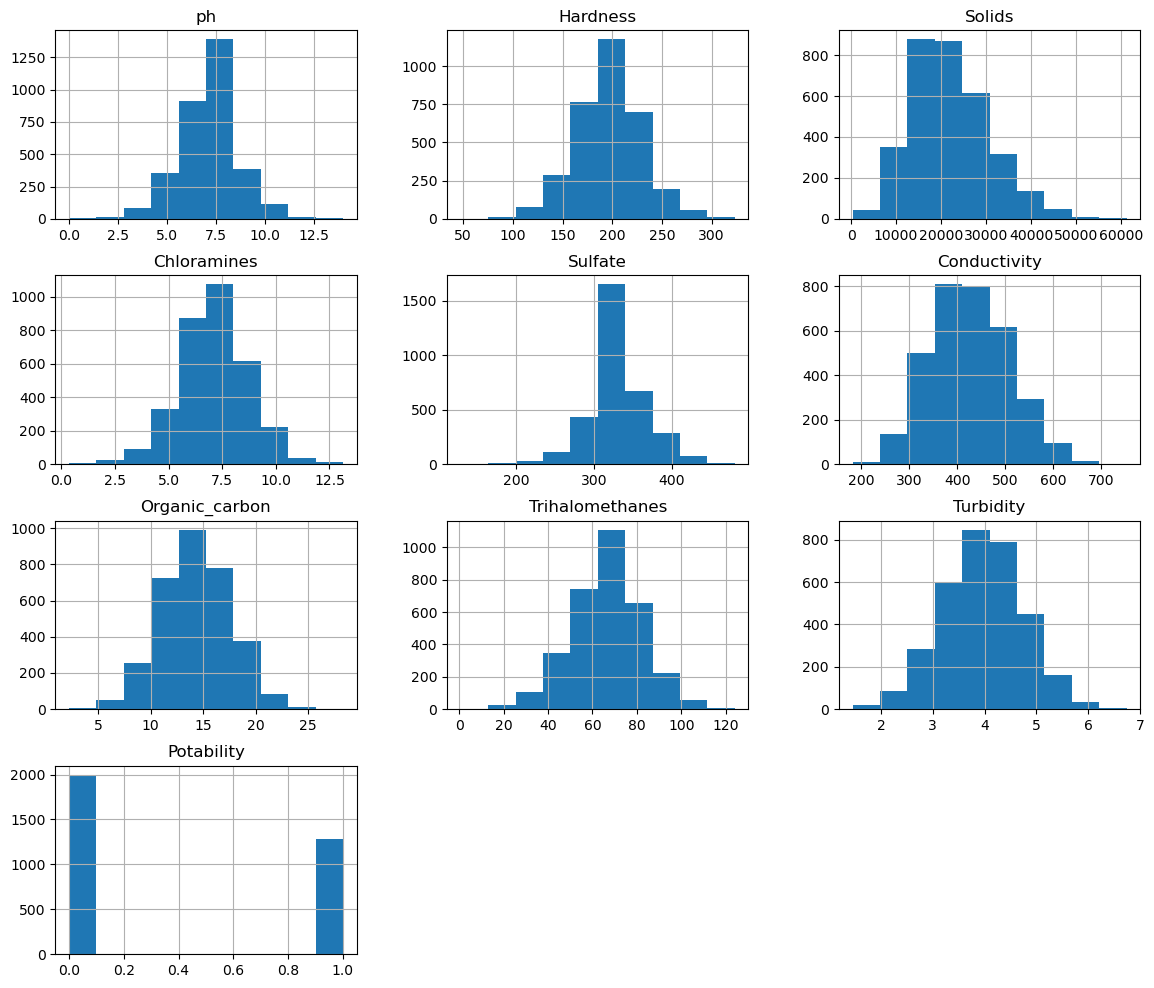

In [12]:
df.hist(figsize=(14,12))
plt.show()

# X = Fitur & Y = Target

In [13]:
x = df.drop('Potability',axis = 1) # Fitur
y = df['Potability'] # Target

# Mencari Nilai Hyperparameter yang paling baik untuk SVM Linear

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])

param_grid = {
    'svm__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Parameter Terbaik:", grid_search.best_params_)
print("Skor Validasi Terbaik: {:.2f}".format(grid_search.best_score_))

# Evaluasi model pada data uji
test_score = grid_search.score(X_test, y_test)
print("Test set score: {:.2f}".format(test_score))


Parameter Terbaik: {'svm__C': 0.001}
Skor Validasi Terbaik: 0.61
Test set score: 0.63


# Mencari Nilai max_depth paling baik untuk Decision Tree

In [41]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)

param_grid = {'max_depth': range(1, 11)}  

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Parameter Terbaik:", grid_search.best_params_)
print("Skor Validasi Terbaik: {:.2f}".format(grid_search.best_score_))

predictions = grid_search.predict(X_test)
print("Akurasi: {:.2f}".format(ac(y_test, predictions)))
print("\nClassification Report:\n", report(y_test, predictions))


Parameter Terbaik: {'max_depth': 6}
Skor Validasi Terbaik: 0.64
Akurasi: 0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.87      0.75       412
           1       0.53      0.24      0.33       244

    accuracy                           0.64       656
   macro avg       0.60      0.56      0.54       656
weighted avg       0.61      0.64      0.60       656



# Mencari Nilai n_neighbors Paling Baik Untuk KNN

In [42]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, 22)}  

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)


print("Parameter Terbaik:", grid_search.best_params_)
print("Skor Validasi Terbaik: {:.2f}".format(grid_search.best_score_))


predictions = grid_search.predict(X_test)
print("Akurasi: {:.2f}".format(ac(y_test, predictions)))
print("\nClassification Report:\n", report(y_test, predictions))

Parameter Terbaik: {'n_neighbors': 20}
Skor Validasi Terbaik: 0.59
Akurasi: 0.61

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.92      0.75       412
           1       0.38      0.08      0.13       244

    accuracy                           0.61       656
   macro avg       0.50      0.50      0.44       656
weighted avg       0.54      0.61      0.52       656



# Eksperimen Dengan 3 Model 
- Decision Tree
- KNN
- SVM Linear

In [14]:
def model_training(x, y, testSize, randomState):
    print('In Function')
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=testSize, random_state=randomState) 
    
    tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, random_state = 0)
    tree.fit(x_train, y_train)
    y_pred_tree = tree.predict(x_test)
    score_tree = ac(y_pred_tree, y_test)
    cm_tree = cm(y_pred_tree, y_test)
    
    knn = KNeighborsClassifier(n_neighbors=20)
    knn_model = knn.fit(x_train, y_train)
    kelas_prediksi = knn_model.predict(x_test)
    score_knn = ac(kelas_prediksi,y_test)
    cm_knn = cm(kelas_prediksi,y_test)
    
    svc = SVC(kernel='linear', C=0.001)
    svc.fit(x_train, y_train)
    y_pred_svm = svc.predict(x_test)
    score_linear = ac(y_pred_svm,y_test)
    cm_linear = cm(y_pred_svm,y_test)
    
    return x_train, y_test, score_tree, cm_tree, y_pred_tree, kelas_prediksi,cm_knn, score_knn, y_pred_svm, score_linear, cm_linear
    
# Asalkan x dan y sudah didefinisikan
# testSize dan randomState diatur sebagai daftar                                                                                                              
testSize = [0.4,0.3,0.2,0.1]
randomState = [502,87356, 41427, 63518, 43851, 32848, 7736, 47552, 5279, 40170, 54863, 23909, 11474, 80637, 8395, 64822]
print('test')
for test_size in testSize:
    print(f"======================Test Size: {test_size}======================")
    for random_state in randomState:
        x_train,y_test, score_tree, cm_tree, y_pred_tree,kelasprediksi,cm_knn, score_knn , y_pred_svm, score_linear, cm_linear= model_training(x, y, test_size, random_state)
        print(f"~~~~~~~~~~Random State: {random_state}~~~~~~~~~~")
        
        print(f"Score Tree: {score_tree * 100} %")
        print(report(y_test, y_pred_tree))
        print(cm_tree)
        print('=='*10)
        
        print(f"Score KNN: {score_knn * 100} %")
        print(report(y_test, kelasprediksi))
        print(cm_knn)
        print('=='*10)
        
        print(f"Score SVM Linear: {score_linear * 100} %")
        print(report(y_test, kelasprediksi))
        print(cm_linear)
        
        print('\n')


test
======================Test Size: 0.4======================
In Function
~~~~~~~~~~Random State: 502~~~~~~~~~~
Score Tree: 64.91228070175438 %
              precision    recall  f1-score   support

           0       0.65      0.94      0.77       803
           1       0.67      0.18      0.29       508

    accuracy                           0.65      1311
   macro avg       0.66      0.56      0.53      1311
weighted avg       0.66      0.65      0.58      1311

[[758 415]
 [ 45  93]]
Score KNN: 60.1067887109077 %
              precision    recall  f1-score   support

           0       0.62      0.91      0.74       803
           1       0.45      0.12      0.19       508

    accuracy                           0.60      1311
   macro avg       0.53      0.51      0.46      1311
weighted avg       0.55      0.60      0.52      1311

[[727 447]
 [ 76  61]]
Score SVM Linear: 61.327231121281464 %
              precision    recall  f1-score   support

           0       0.62      0